# Линейная регрессия для показателей температуры на основе данных метеостанций в дни Второй Мировой

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Набор данных содержит информацию о погодных условиях, регистрируемых каждый день на различных метеостанциях по всему миру в ходе второй мировой. Информация включает в себя осадки снегопад, температуру, скорость ветра и то, были ли в этот день грозы или другие плохие погодные условия.

In [2]:
data = pd.read_csv("summary_of_weather.csv")

In [3]:
data

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


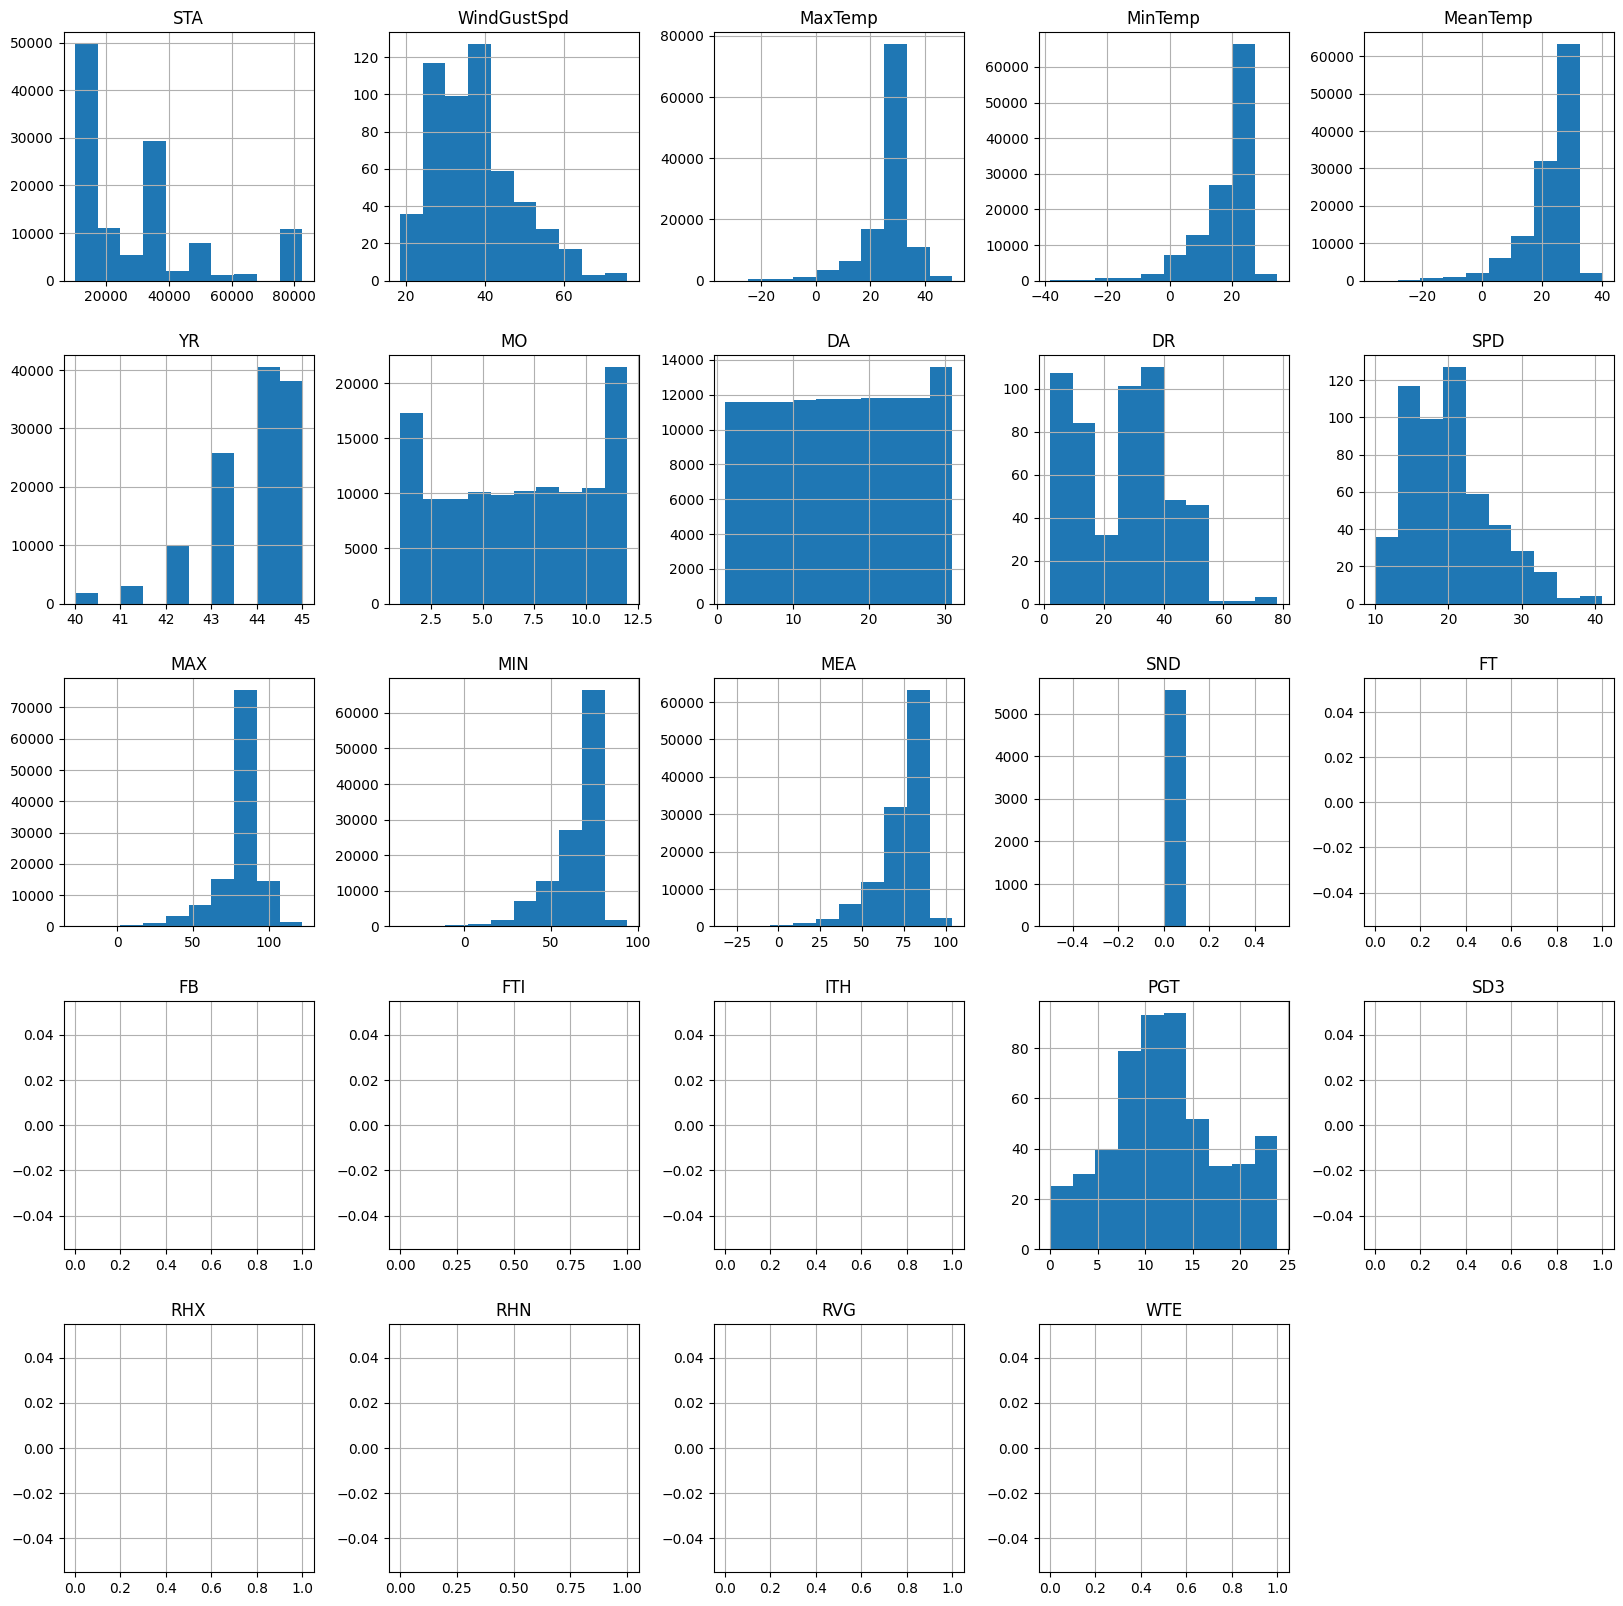

In [4]:
data.hist(figsize=(20,20))
plt.show();

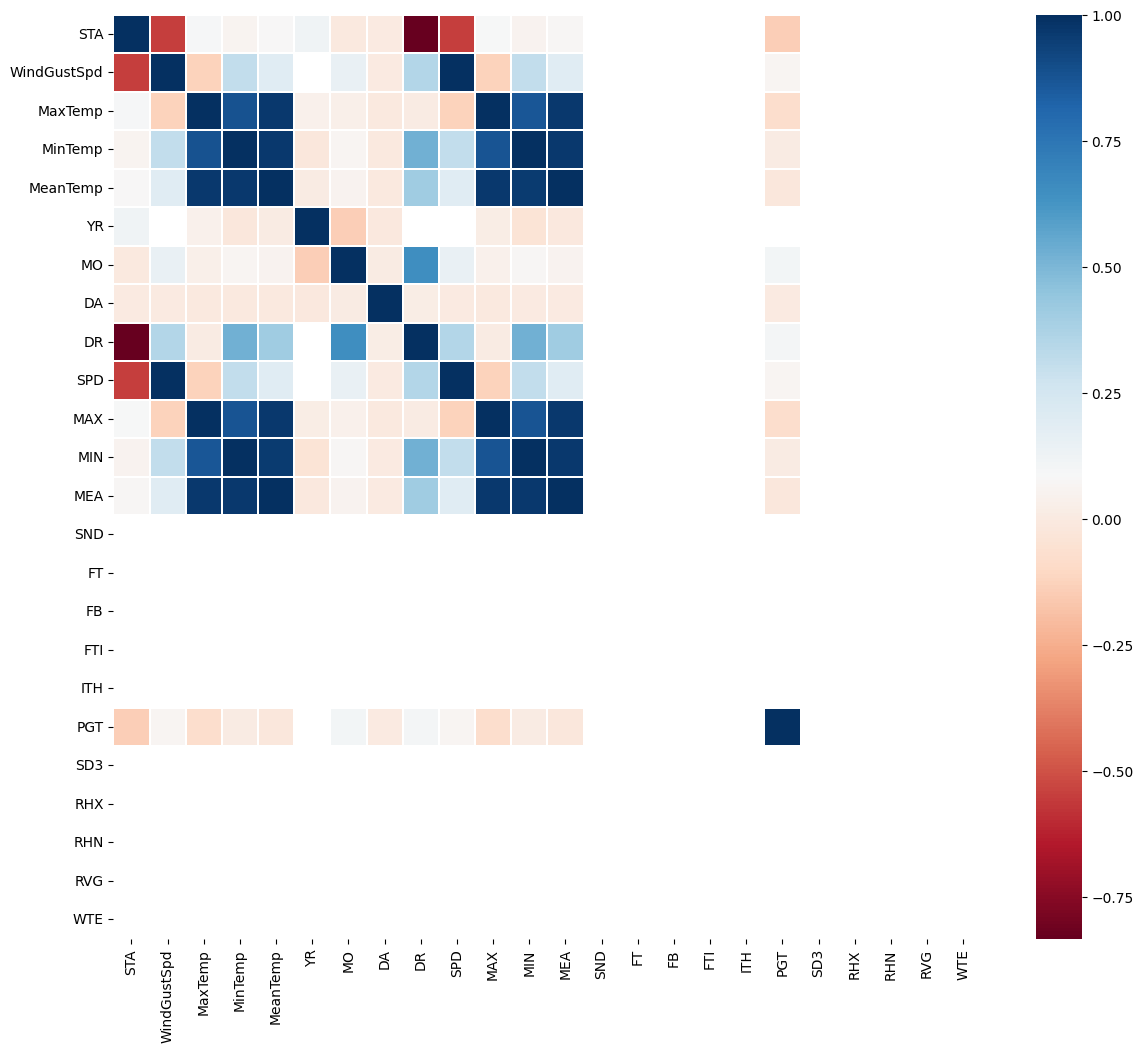

In [5]:
corr = data.corr()
ax, fig = plt.subplots(figsize=(14,12))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="RdBu")

## Линейная регрессия на основе минимальной/максимальной температуры в течение суток

In [6]:
x_data = data['MinTemp']
y_data = data['MaxTemp']

x = np.array(x_data).reshape(-1, 1)
y = np.array(y_data)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 42, train_size=0.8)

In [9]:
print(X_test.shape)

(23808, 1)


In [10]:
print(y_test.shape)

(23808,)


# Обучение модели (Линейная регрессия)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [13]:
print(linreg.intercept_)

10.688361885874766


In [14]:
print(linreg.coef_)

[0.91888999]


## Тренировочные данные

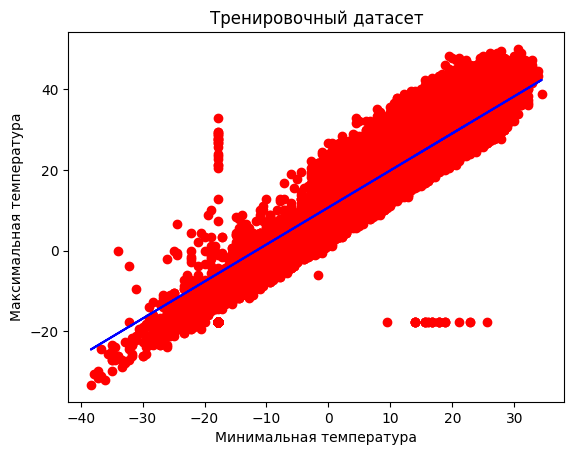

In [15]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linreg.predict(X_train), color = 'blue')
plt.title ("Тренировочный датасет")
plt.xlabel("Минимальная температура")
plt.ylabel("Максимальная температура")
plt.show()

## Тестовые данные

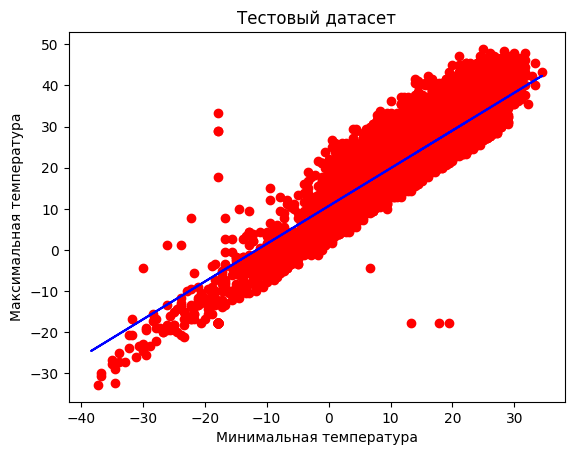

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, linreg.predict(X_train), color = 'blue')
plt.title("Тестовый датасет")
plt.xlabel("Минимальная температура")
plt.ylabel("Максимальная температура")
plt.show()

### Среднее значение по оси

In [17]:
x_mean = np.mean(x)
print('x_mean :',x_mean)
print()
y_mean = np.mean(y)
print('y_mean :',y_mean)

x_mean : 17.78951052859451

y_mean : 27.045110887087183


### Медиана

In [18]:
x_median = np.median(x)
print('x_median :',x_median)
print()
y_median = np.median(y)
print('y_median :',y_median)

x_median : 21.11111111

y_median : 29.44444444


### Наиболее встречающееся значение

In [19]:
x_mode = stats.mode(x)
print('x_mode :',x_mode)
print()
y_mode = stats.mode(y)
print('y_mode :',y_mode)

x_mode : ModeResult(mode=array([[22.22222222]]), count=array([[8704]]))

y_mode : ModeResult(mode=array([30.]), count=array([8337]))


### Среднеквадратичное отклонение

In [20]:
x_stdev = np.std(x)
print('standard deviation(x)',x_stdev)
print()
y_stdev = np.std(y)
print('standard deviation(y)',y_stdev)

standard deviation(x) 8.33453684225561

standard deviation(y) 8.717780031298934


### Дисперсия

In [21]:
x_var = np.var(x)
print('variance(x)',x_var)
y_var = np.var(y)
print('variance(y)',x_var)

variance(x) 69.46450437491609
variance(y) 69.46450437491609
